# Credit Card Fraud Detection::

Download dataset from this link:

https://www.kaggle.com/mlg-ulb/creditcardfraud

# Description about dataset::

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. 


### Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# WORKFLOW :

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Standardized the Input Variables. 

4.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

5.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

6.Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)

7.Train the Model with Epochs (100).

8.If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .

9.Prediction should be > 92%
10.Evaluation Step
11Prediction


# Task::

## Identify fraudulent credit card transactions.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

from sklearn.metrics import confusion_matrix

In [2]:
pd.options.display.max_columns = None #To display all the columns in csv

In [3]:
df = pd.read_csv('../datasets/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,1.772925e-15,9.289524e-16,-1.803266e-15,1.674888e-15,1.475621e-15,3.501098e-15,1.392460e-15,-7.466538e-16,4.258754e-16,9.019919e-16,5.126845e-16,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.shape

(284807, 31)

In [7]:
df.drop_duplicates(subset=None,inplace=True)

In [8]:
df.shape

(283726, 31)

### Time Distribution when no Fraud

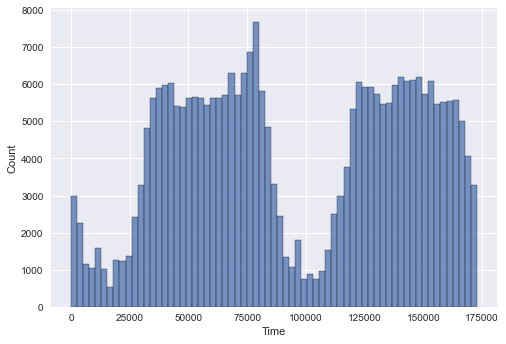

In [9]:
plt.style.use('seaborn')
sns.histplot(data=df[df.Class==0], x='Time')
plt.show()

### Time Distribution when Fraud

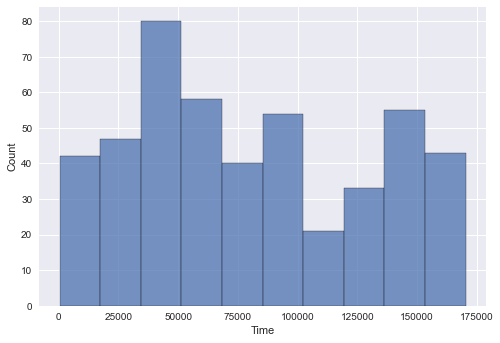

In [10]:
plt.style.use('seaborn')
sns.histplot(data=df[df.Class==1], x='Time')
plt.show()

### Amount Distribution when no Fraud

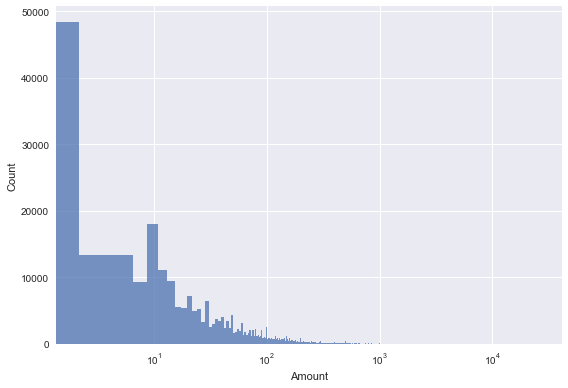

In [11]:
plt.style.use('seaborn')
sns.histplot(data=df[df.Class==0], x='Amount')
plt.xscale('log')
plt.tight_layout()

### Amount Distribution when Fraud

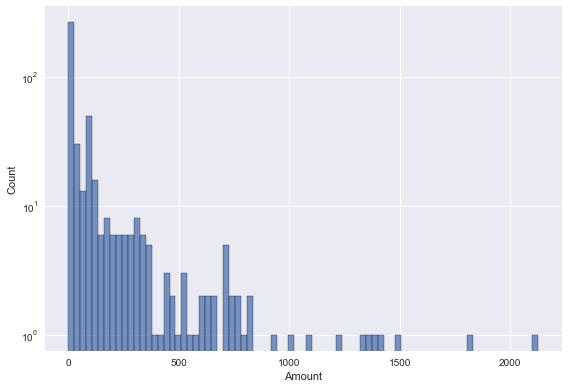

In [12]:
plt.style.use('seaborn')
sns.histplot(data=df[df.Class==1], x='Amount')
plt.yscale('log')
plt.tight_layout()

### Total Fraud and No Fraud Detected 
#### Class 0 = No Fraud, Class 1 = Fraud

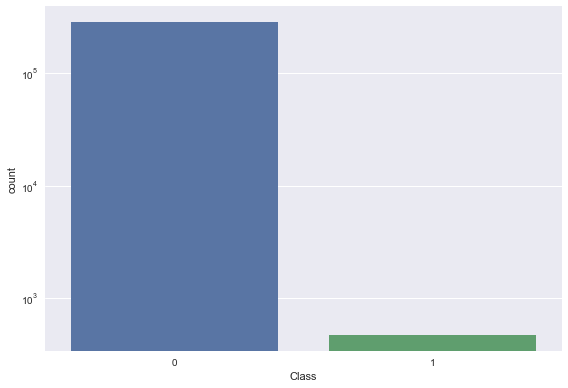

In [13]:
sns.countplot(data=df,x='Class')
plt.yscale('log')
plt.tight_layout()

In [14]:
df.iloc[:,:-1].corrwith(df[df.columns[-1]]) #Checking correlation of features with Class (Target)

Time     -0.012359
V1       -0.094486
V2        0.084624
V3       -0.182322
V4        0.129326
V5       -0.087812
V6       -0.043915
V7       -0.172347
V8        0.033068
V9       -0.094021
V10      -0.206971
V11       0.149067
V12      -0.250711
V13      -0.003897
V14      -0.293375
V15      -0.003300
V16      -0.187186
V17      -0.313498
V18      -0.105340
V19       0.033631
V20       0.021486
V21       0.026357
V22       0.004887
V23      -0.006333
V24      -0.007210
V25       0.003202
V26       0.004265
V27       0.021892
V28       0.009682
Amount    0.005777
dtype: float64

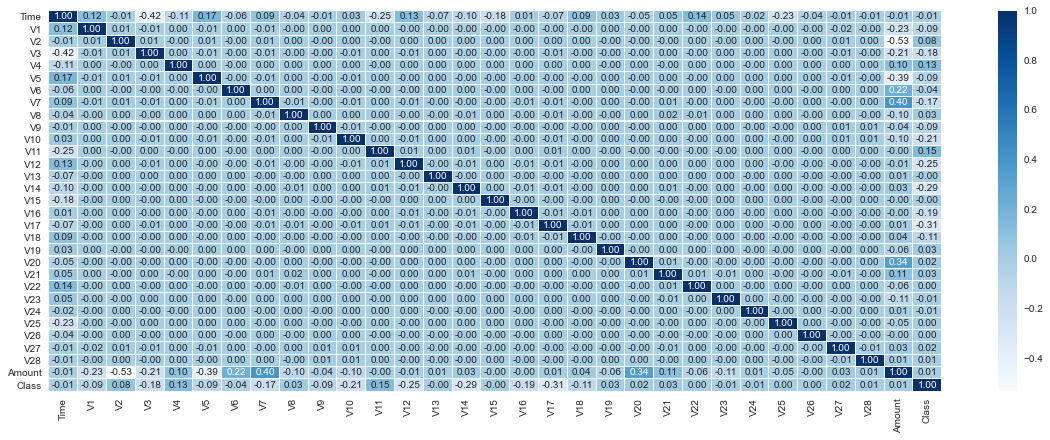

In [15]:
plt.style.use('seaborn')
plt.figure(figsize=(20,7))
sns.heatmap(df.corr(), linewidths=0.1, cmap='Blues', annot=True, fmt='.2f')
plt.show()

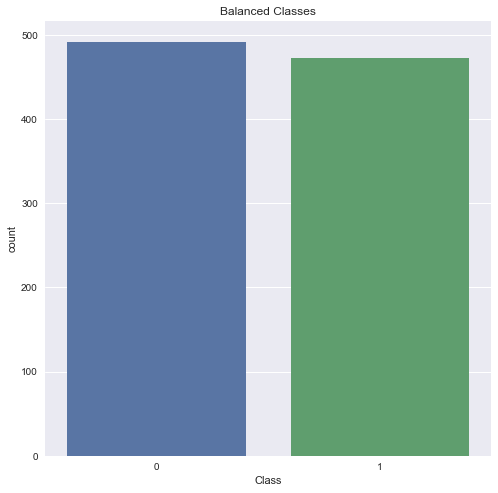

In [16]:
df_shuffled = df.sample(frac=1,random_state=4)

# Put all the fraud class in a separate dataset.
df_fraud = df_shuffled.loc[df_shuffled['Class'] == 1]

#Randomly select 492 observations from the non-fraud (majority class)
nfraud_df = df_shuffled.loc[df_shuffled['Class'] == 0].sample(n=492,random_state=42)

# Concatenate both dataframes again
norm_df = pd.concat([df_fraud, nfraud_df])

#plot the dataset after the undersampling
plt.figure(figsize=(8, 8))
sns.countplot(x='Class', data=norm_df)
plt.title('Balanced Classes')
plt.show()

## Scaling DataSet

In [17]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [18]:
X = norm_df.iloc[:,:-1].values #Features
y = norm_df.iloc[:,-1:].values #Target

In [19]:
X = ss.fit_transform(X)

# Splitting Into Traning and Testing and Validation

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.5, shuffle=True)

In [21]:
X_val, X_test, y_val, y_test = train_test_split(X_test,y_test, train_size=0.4, shuffle=True)

# Model

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten

In [23]:
X_train.shape

(482, 30)

In [24]:
model = Sequential([Dense(32,input_shape=(30,), activation = 'relu'),
                    Dropout(0.2),
                    Dense(10),
                    Dropout(0.2),
                    Dense(8),
                    Dropout(0.2),
                    Dense(6),
                    Dropout(0.2),
                    Dense(1, activation='sigmoid')])

## Compile

In [25]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

## Train

In [26]:
history = model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
16/16 [==============================] - 2s 5ms/step - loss: 0.7146 - accuracy: 0.5405
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 0.5850 - accuracy: 0.6957
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5224 - accuracy: 0.7423
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 0.4661 - accuracy: 0.7942
Epoch 5/100
16/16 [==============================] - 0s 4ms/step - loss: 0.4302 - accuracy: 0.8211
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.3741 - accuracy: 0.8625
Epoch 7/100
16/16 [==============================] - 0s 1ms/step - loss: 0.3570 - accuracy: 0.8567
Epoch 8/100
16/16 [==============================] - 0s 4ms/step - loss: 0.3502 - accuracy: 0.8689
Epoch 9/100
16/16 [==============================] - 0s 864us/step - loss: 0.3538 - accuracy: 0.8279
Epoch 10/100
16/16 [==============================] - 0s 2ms/step - loss: 0.2829 - accuracy: 0.8928
Epoch 1

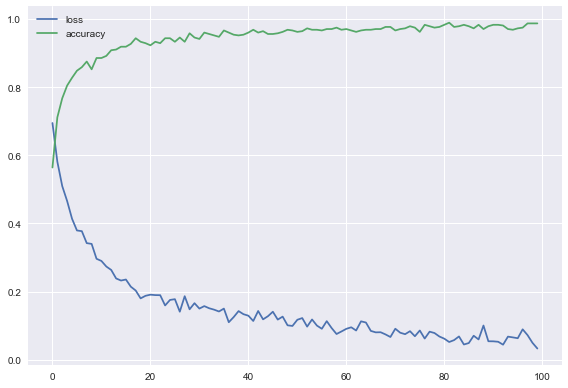

In [27]:
plt.style.use('seaborn')
pd.DataFrame(history.history)[['loss','accuracy']].plot()
plt.tight_layout()

# Evaluate

In [28]:
test_evaluation = model.evaluate(X_test,y_test)

10/10 [==============================] - 0s 4ms/step - loss: 0.2755 - accuracy: 0.9379


In [29]:
print("Test Evaluation\nLoss = {:.3f}%\nAccuracy = {:.3f}%".format(test_evaluation[0]*100,test_evaluation[1]*100))

Test Evaluation
Loss = 27.547%
Accuracy = 93.793%


In [30]:
val_evaluation = model.evaluate(X_val,y_val)

7/7 [==============================] - 0s 3ms/step - loss: 0.6664 - accuracy: 0.9119


In [31]:
print("Val_Evaluation\nLoss = {:.3f}%\nAccuracy = {:.3f}%".format(val_evaluation[0]*100,val_evaluation[1]*100))

Val_Evaluation
Loss = 66.639%
Accuracy = 91.192%


In [32]:
model_history = pd.DataFrame(history.history)

In [33]:
model_history

,loss,accuracy
0,0.694951,0.564315
1,0.581406,0.711618
2,0.509649,0.767635
3,0.465760,0.804979
4,0.413781,0.827801
...,...,...
95,0.062874,0.973029
96,0.089075,0.975104
97,0.071989,0.987552
98,0.049488,0.987552


# Prediction 

In [34]:
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)

In [35]:
confusion_matrix(y_test,y_pred, labels=[0,1])

array([[138,  10],
       [  8, 134]], dtype=int64)

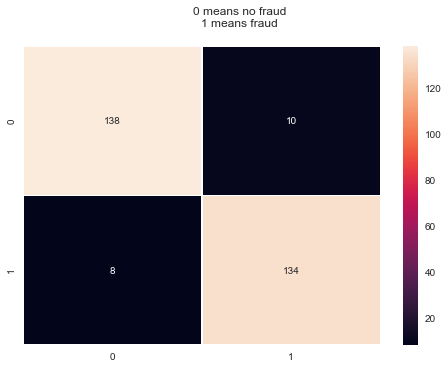

In [36]:
sns.heatmap(confusion_matrix(y_test,y_pred, labels=[0,1]), annot=True, linewidths=0.5, fmt='')
plt.suptitle('0 means no fraud\n1 means fraud')
plt.show()

In [37]:
pd.DataFrame([{'Total no. of Fraud Actual':(y_test==1).sum(), 'Total no. of Fraud Predicted':(y_pred==1).sum(),'Total no. of No Fraud Actual':(y_test==0).sum(), 'Total no. of No Fraud Predicted':(y_pred==0).sum()}])

,Total no. of Fraud Actual,Total no. of Fraud Predicted,Total no. of No Fraud Actual,Total no. of No Fraud Predicted
0,142,144,148,146


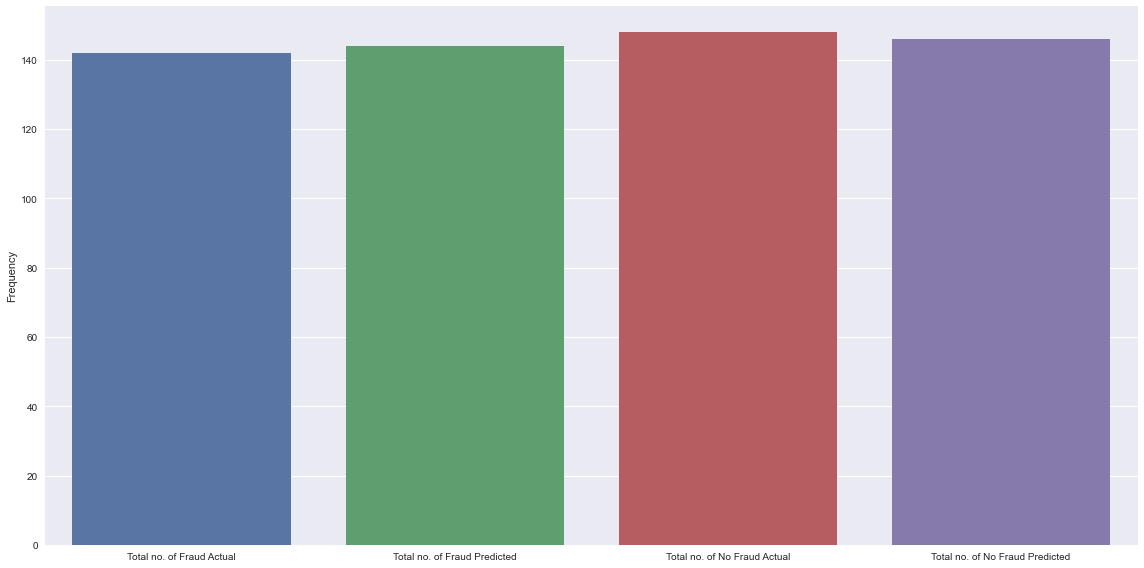

In [38]:
plt.style.use('seaborn')
plt.figure(figsize=(16,8))
sns.barplot(data=pd.DataFrame([{'Total no. of Fraud Actual':(y_test==1).sum(), 'Total no. of Fraud Predicted':(y_pred==1).sum(),'Total no. of No Fraud Actual':(y_test==0).sum(), 'Total no. of No Fraud Predicted':(y_pred==0).sum()}]))
plt.ylabel('Frequency')
plt.tight_layout()

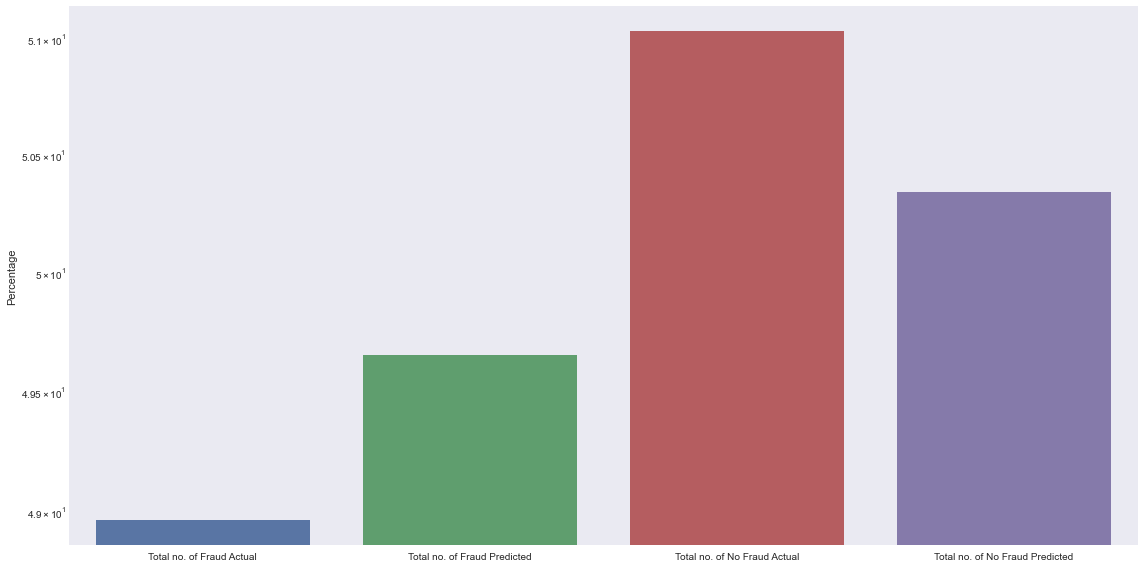

In [39]:
plt.style.use('seaborn')
plt.figure(figsize=(16,8))
sns.barplot(data=pd.DataFrame([{'Total no. of Fraud Actual':(y_test==1).sum()/len(y_test) * 100, 'Total no. of Fraud Predicted':(y_pred==1).sum()/len(y_pred) * 100,'Total no. of No Fraud Actual':(y_test==0).sum()/len(y_pred) * 100, 'Total no. of No Fraud Predicted':(y_pred==0).sum()/len(y_pred) * 100}]))
plt.ylabel('Percentage')
plt.yscale('log')
plt.tight_layout()

In [40]:
scores_df = pd.DataFrame([{"Loss Validation Set":val_evaluation[0],"Accuracy Validation Set":val_evaluation[1], "Loss Test Set":test_evaluation[0],"Accuracy Test Set":test_evaluation[1]}])

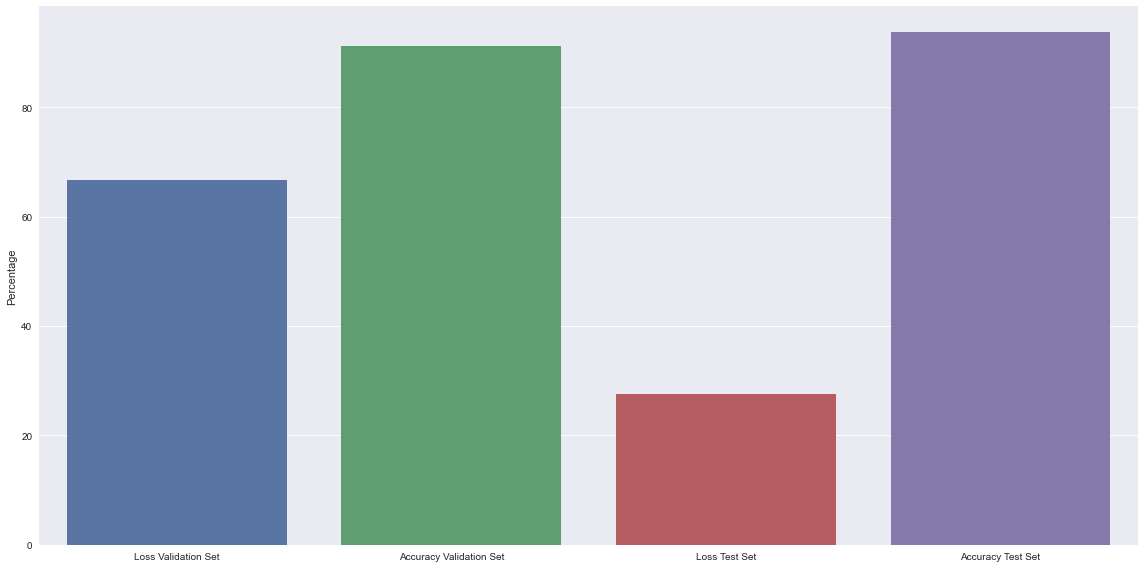

In [41]:
plt.style.use('seaborn')
plt.figure(figsize=(16,8))
sns.barplot(data=scores_df*100)
plt.ylabel("Percentage")
plt.tight_layout()

In [42]:
from sklearn.metrics import accuracy_score
print("Prediction Accuracy: {:.3f}".format(accuracy_score(y_test, y_pred)))

Prediction Accuracy: 0.938


In [43]:
print("Prediction Accuracy: {:.3f}%".format(accuracy_score(y_test, y_pred)*100))

Prediction Accuracy: 93.793%
